# sklearn für unüberwachtes Lernen

Wir werden jetzt auch  eine andere unüberwachte Lerntechnik demonstrieren. Den  k-Means-Algorithmus haben wir ja schon kennengelernt. Ein weiterer Algorithmus für diesen Zweck ist DBSCAN. Während k-Means Zentroide festlegt und die einzelnen Punkte mit einem Abstandsmaß diesen Zentroide optimal zuordnet, wird bei DBSCAN festgestellt, wie groß die Punktdichte um jeden einzelnen Punkt ist, definiert als die Zahl von Punkten, die in einem bestimmten Radius um jeden Punkt liegen. Ein Vorteil des Verfahrens liegt in der grossen Leistungsfähigkeit für nicht linear separierbare Werte. Dabei werden für einen bestimmten Radius "epsilon" die Punkte als <b>Kernpunkte</b> bezeichnet, die mindestens eine Anzahl von "minPoints" Punkten als Nachbarn innerhalb dieses Radius haben. Ein <b>Grenzpunkt</b> hat weniger Nachbarn als "minPoints", liegt aber im Radius eines Kernpunktes. Der Rest der Punkte sind <b>Rauschpunkte</b>.<br><b><br><img width=800 height=800 class="imgright" src="Images/DBSCAN.png"><br><br>

Der Algorithmus formt dann einen eigenen Cluster für jeden Kernpunkt und ordnet ihm die Grenzpunkte zu. Solche Cluster werden miteinander zu einem neuen Cluster verbunden, wenn ihr Kernpunkt-Abstand kleiner als epsilon ist.<br><b><br><img width=800 height=800 class="imgright" src="Images/DBSCAN_connect.png"><br><br>

Wir werden nun eine besondere Leistung des DBSCAN-Verfahrens demonstrieren, nämlich die relative Unabhängigkeit von der Form der Cluster, indem wir eine zweidimensionale Punktwolke, in der 2 Halbmonde oder zwei konzentrische Kreise dargestellt sind, in 2 Cluster aufteilen lassen, einmal mit k-Means, einmal mit DBSCAN. sklearn bietet hierfür einen Datensatz "make_moons".

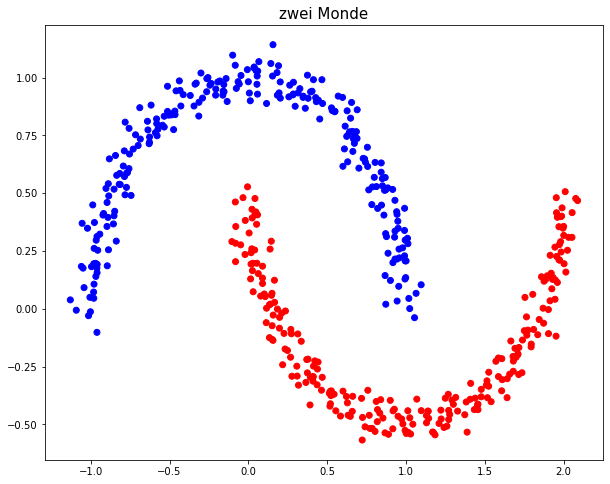

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
moons,y = make_moons(n_samples=500,noise=.05,random_state=1) #noise misst die Streuung der Punkte, random_state sorgt für
                                                             #Wiederholbatrkeit
                                                            
fig, ax = plt.subplots(figsize=(10,8))
plt.title("zwei Monde",fontsize=15) 
colormap=np.array(["blue","red"])
plt.scatter(moons[:,0],moons[:,1],c=colormap[y])
plt.show()

So hätten wir gerne das Endergebnis. Was wir aber eingeben sind nur die x und y Koordinate der Punkte.

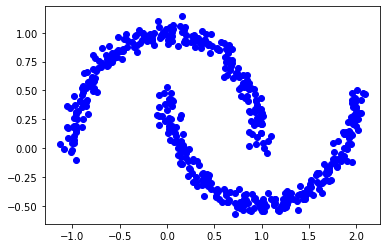

In [2]:
plt.scatter(moons[:,0],moons[:,1],c="blue")
plt.show()

Auch werden wir unsere konzentrischen Kreise, die mit sklearn make_circles erzeugt wurden, verwenden. Unten zeigen wir die Klasifikationen mit k-means.

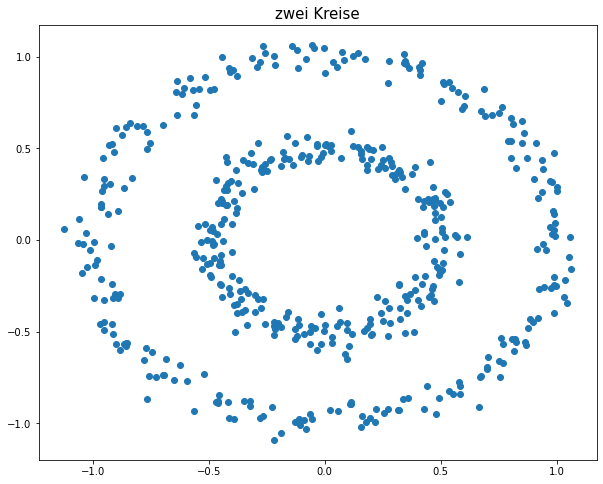

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as dset                                                          
circles,y = dset.make_circles(n_samples=500, factor=0.5, noise=0.05)                                                         
fig, ax = plt.subplots(figsize=(10,8))
plt.title("zwei Kreise",fontsize=15)                                                            
plt.scatter(circles[:,0],circles[:,1])
plt.show()

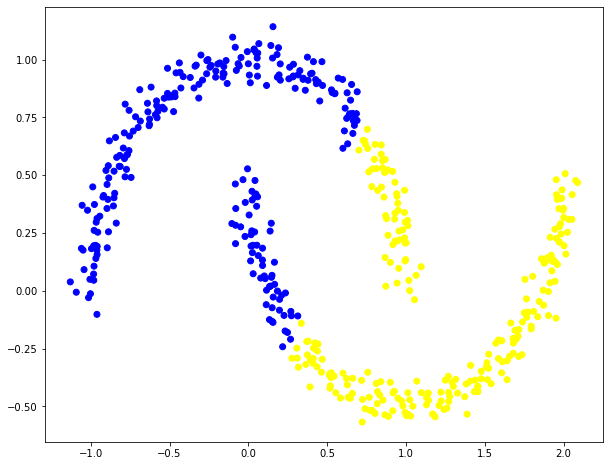

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
moons,y = make_moons(n_samples=500,noise=.05,random_state=1)
kmeans= KMeans(n_clusters=2)
labels=kmeans.fit_predict(moons)
labels.reshape(500,1)
fig, ax = plt.subplots(figsize=(10,8))
colormap=np.array(["blue","yellow","green","black","orange","red"])
plt.scatter(moons[:,0],moons[:,1],c=colormap[labels])

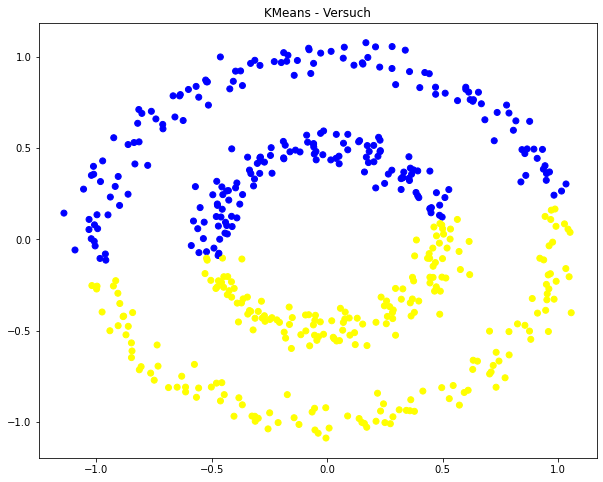

In [5]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import sklearn.datasets as dset                                                          
circles,y = dset.make_circles(n_samples=500, factor=0.5, noise=0.05) 
kmeans= KMeans(n_clusters=2)
labels=kmeans.fit_predict(circles)
labels.reshape(500,1)
fig, ax = plt.subplots(figsize=(10,8))
plt.title("KMeans - Versuch")
colormap=np.array(["blue","yellow","green","black","orange","red"])
plt.scatter(circles[:,0],circles[:,1],c=colormap[labels])

<b>In beiden Fällen versagt k-Means kläglich. Wie schlägt sich DBSCAN?

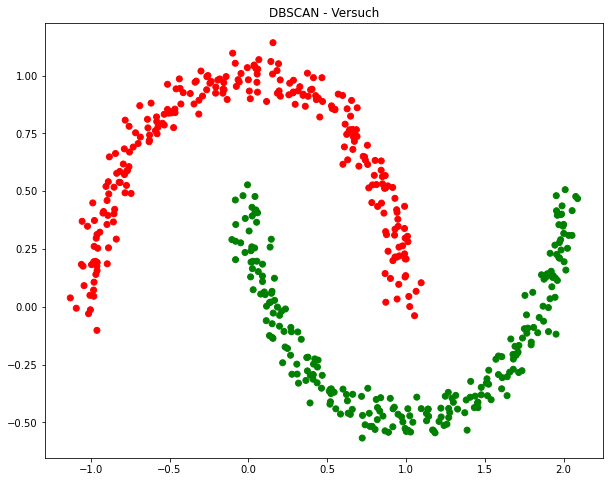

In [6]:
from sklearn.cluster import DBSCAN

colormap = np.array(['green', 'red','blue',"black"])


dbobj=DBSCAN(eps=.2,min_samples=5,metric="euclidean")
labels=dbobj.fit_predict(moons)

labels.reshape(500,1)
fig, ax = plt.subplots(figsize=(10,8))
plt.title("DBSCAN - Versuch")


plt.scatter(moons[:,0],moons[:,1],c=colormap[labels])
plt.show()



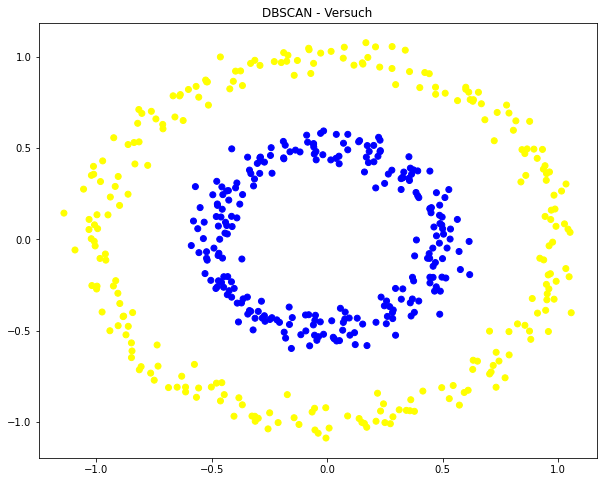

In [7]:
from sklearn.cluster import DBSCAN
dbobj=DBSCAN(eps=.2,min_samples=5,metric="euclidean")
labels=dbobj.fit_predict(circles)
labels.reshape(500,1)
fig, ax = plt.subplots(figsize=(10,8))
plt.title("DBSCAN - Versuch")
colormap=np.array(["blue","yellow"])
plt.scatter(circles[:,0],circles[:,1],c=colormap[labels])

<b>Sehr gut! Es kann die Punktewolken mit der besonderen Form eindeutig trennen.</b> Aber wie ist der Einfluß der Hyperparameter "epsilon" und "min_samples"? "epsilon" steht ja für den Abstand, in dem nach Nachbarpunkten gesucht wird und "min_samples" für die minimale Anzahl von Punkte im Suchradius, damit ein Punkt Kernpunkt wird.

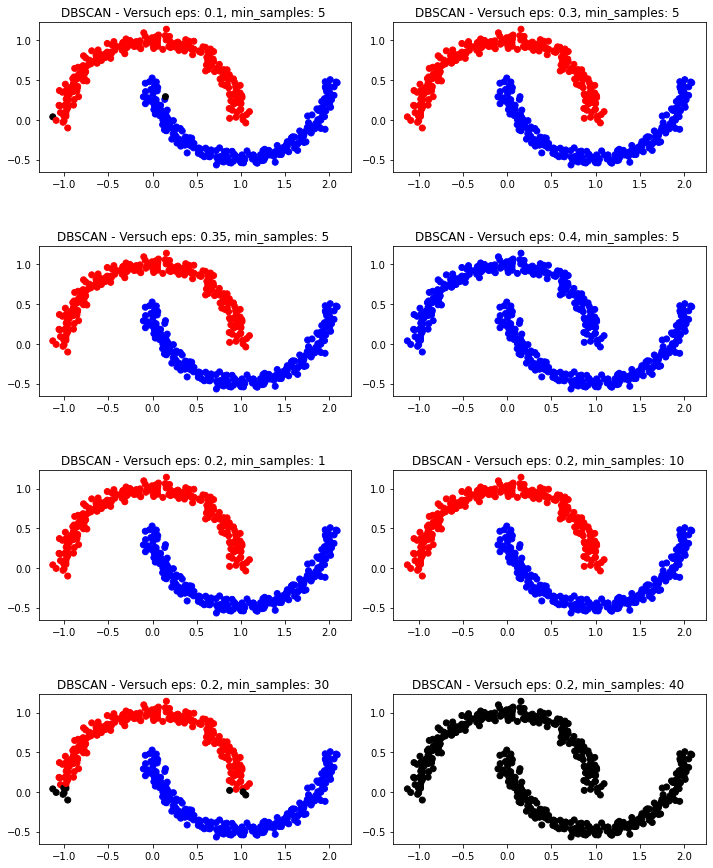

In [8]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
moons,y = make_moons(n_samples=500,noise=.05,random_state=1)



fig, ax = plt.subplots(4, 2, figsize=(10,12)) ##figsize bestimmt eine identische Größe für alle Einzelplots
 

fig.tight_layout()
fig.subplots_adjust(hspace=.5) ### genug Abstand um alle Achsen mit Beschriftung abzubilden ###


plt.subplot(4,2,1) 
dbobj=DBSCAN(eps=.1,min_samples=5,metric="euclidean")
labels=dbobj.fit_predict(moons)
labels.reshape(500,1)
colormap=np.array(["black","blue","red"])
plt.scatter(moons[:,0],moons[:,1],c=colormap[labels+1])
plt.title("DBSCAN - Versuch eps: 0.1, min_samples: 5 ")

plt.subplot(4,2,2) 
dbobj=DBSCAN(eps=.3,min_samples=5,metric="euclidean")
labels=dbobj.fit_predict(moons)
labels.reshape(500,1)
colormap=np.array(["blue","red"])
plt.scatter(moons[:,0],moons[:,1],c=colormap[labels])
plt.title("DBSCAN - Versuch eps: 0.3, min_samples: 5 ")

plt.subplot(4,2,3)
dbobj=DBSCAN(eps=.35,min_samples=5,metric="euclidean")
labels=dbobj.fit_predict(moons)
labels.reshape(500,1)
colormap=np.array(["blue","red"])
plt.scatter(moons[:,0],moons[:,1],c=colormap[labels])
plt.title("DBSCAN - Versuch eps: 0.35, min_samples: 5 ")

plt.subplot(4,2,4) 
dbobj=DBSCAN(eps=.4,min_samples=5,metric="euclidean")
labels=dbobj.fit_predict(moons)
labels.reshape(500,1)
colormap=np.array(["black","blue","red"])
plt.scatter(moons[:,0],moons[:,1],c=colormap[labels+1])
plt.title("DBSCAN - Versuch eps: 0.4, min_samples: 5 ")

plt.subplot(4,2,5) 
dbobj=DBSCAN(eps=.2,min_samples=1,metric="euclidean")
labels=dbobj.fit_predict(moons)
labels.reshape(500,1)
colormap=np.array(["blue","red"])
plt.scatter(moons[:,0],moons[:,1],c=colormap[labels])
plt.title("DBSCAN - Versuch eps: 0.2, min_samples: 1 ")

plt.subplot(4,2,6) 
dbobj=DBSCAN(eps=.2,min_samples=10,metric="euclidean")
labels=dbobj.fit_predict(moons)
labels.reshape(500,1)
colormap=np.array(["blue","red"])
plt.scatter(moons[:,0],moons[:,1],c=colormap[labels])
plt.title("DBSCAN - Versuch eps: 0.2, min_samples: 10 ")

plt.subplot(4,2,7) 
dbobj=DBSCAN(eps=.2,min_samples=30,metric="euclidean")
labels=dbobj.fit_predict(moons)
labels.reshape(500,1)
#print(labels)
colormap=np.array(["black","blue","red"])
plt.scatter(moons[:,0],moons[:,1],c=colormap[labels+1])
plt.title("DBSCAN - Versuch eps: 0.2, min_samples: 30 ")

plt.subplot(4,2,8)
dbobj=DBSCAN(eps=.2,min_samples=40,metric="euclidean")
labels=dbobj.fit_predict(moons)
labels.reshape(500,1)
#print(labels)
colormap=np.array(["black","blue","red"])
plt.scatter(moons[:,0],moons[:,1],c=colormap[labels+1])
plt.title("DBSCAN - Versuch eps: 0.2, min_samples: 40 ")

plt.show()

Wir sehen, daß (bei min_samples von 5) epsilon ab 0.4 nicht mehr die Daten trennt, unter .08 bekommen wir sogar eine undifferenzierte Fehlermeldung. min_samples funktioniert (bei epsilon von 0.2) von 1!! bis 30, ab 40 trennt DBSCAN ebenfalls nicht mehr. Es ist also wichtig, die Hyperparameter zu optimieren.

Zu beachten ist, daß bei DBSCAN Rauschpunkte übrig bleiben können, die einem zusätzlichen Cluster mit dem Label -1 zugeordnet werden, wie wir in diesem Beispiel zeigen.<br><br><img width=800 height=800 class="imgright" src="Images/Rauschpunkte.png"><br><br>

Es gibt insgesamt viele ML Algorithmen, die Zahl von klar zu differenzierenden ML Algorithmen bewegt sich derzeit nahe 100. Im Rahmen dieses Tutorials können wir natürlich nicht alle ansprechen, geschweige denn auf die jeweiligen Vor- und Nachteile hinweisen. ML ist ein sehr umfangreiches Gebiet und das Wissen über die verschiedenen Lernalgorithmen bestimmt letztlich über die Qualität eines "Datascientist". Es ist aber zu betonen, daß im Gebiet des unsupervised learnings noch eine starke Entwicklung im Gange ist, während beim supervised learning eher Deatils verbessert werden. Wir wollen im Rahmen dieses Tutorials nun von Grund auf neuronale Netze behandeln, um diese wichtigen Metoden des ML genauer anzusehen und auch ihre Vertiefung mit "deep learning" in den nächsten Kapiteln besprechen.